In [1]:
import pandas as pd
df=pd.read_csv("d:/data/energy/ENB2012_data.csv") # 난방효율성 데이터
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [2]:
train_cols=df.columns[0:8]
X=df[train_cols]
y=df["Y1"] # 난방 하중
print(X.head())
print(y.head())

     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [4]:
# Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균)/표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러 → 가중치가 1000배가 되지 않도록 해야 함

mean_on_train=X_train.mean(axis=0) # 학습용 데이터셋의 변수들의 평균값 계산
std_on_train=X_train.std(axis=0) # 학습용 데이터셋의 변수들의 표준편차 계산

# 값에서 평균을 빼고 표준편차로 나누면 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled=(X_train-mean_on_train)/std_on_train
# 검증용 데이터셋에서도 같은 작업을 적용
X_test_scaled=(X_test-mean_on_train)/std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

                 X1            X2            X3            X4            X5  \
count  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02   
mean  -1.573009e-15 -6.746147e-17  3.618028e-16  7.941179e-17  7.247289e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.346764e+00 -1.817237e+00 -1.712958e+00 -1.498746e+00 -9.751352e-01   
25%   -9.654262e-01 -7.719025e-01 -5.749374e-01 -6.825365e-01 -9.751352e-01   
50%   -2.027511e-01  1.340545e-01 -5.927190e-03  9.498830e-01 -9.751352e-01   
75%    6.552584e-01  9.703225e-01  5.630831e-01  9.498830e-01  1.023718e+00   
max    2.085274e+00  1.527835e+00  2.270114e+00  9.498830e-01  1.023718e+00   

                 X6            X7            X8  
count  5.760000e+02  5.760000e+02  5.760000e+02  
mean   3.854941e-17  2.937465e-16 -4.375358e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.329847e+00 -1.775710e+00 -1.827180e+00  
25%   -4.297389e-01 -1.026125e+00 -5.2

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=2)

In [6]:
a=model.predict(X_test_scaled)
print(a.flatten()[:10])
b=y_test.values.flatten()
print(b[:10])

[15.29  10.455 36.3   16.695 32.54  28.94  28.485 28.945 28.915 30.615]
[15.18 10.32 37.26 16.95 32.26 27.9  28.18 28.95 29.07 23.8 ]


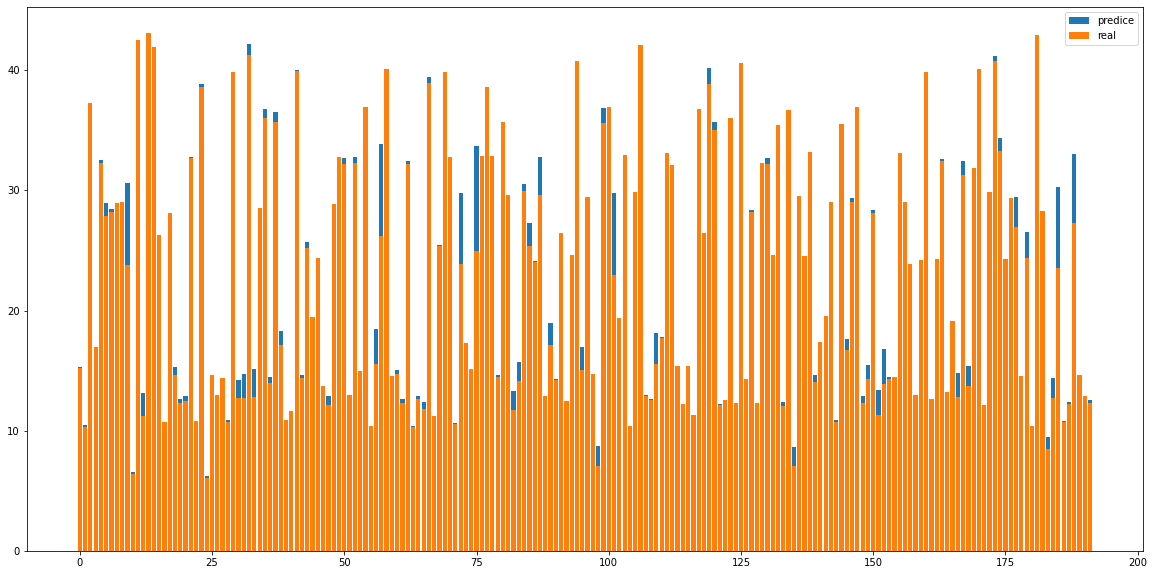

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(a)), a, label='predict')
plt.bar(range(len(b)), b, label='real')
plt.legend()

In [8]:
model.score(X_test_scaled, y_test) # score() 함수의 결과값 - R Square value

0.9488389791859465